## Feature Importance of Brain Strain Linear Model
This file is trying to look at the feature importance of brain strain signals from linear models. The workflow looks roughly like the following.

1. Build a linear model over the dataset by:
  - Feature selection using VIF until there is no severe collinearity effect
  - Use no other feature selection method, taking all the variables into the model
  - First use least squared fit, then consider huber fit
2. Find feature importance of the model by:
  - Using `first`, `last` and `standard coefficients` methods
  - Test the robustness of this ranking by:
    - Compare results in different dataset;
    - Acquired by different methods

In [8]:
# laod packages
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



## VIF Stepwise Selection

In [9]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = list(range(X.shape[1]))
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return(vif)

In [10]:
# load data
X = np.load('data/X/HM_X_ang_vel.npy')
Y = np.load('data/Y/HM_MPS95.npy')

2.4608412737497835e+31


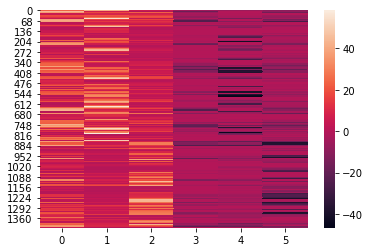

In [42]:
# basic info of X
print(np.max(X))
import seaborn as sns
sns.heatmap(X[:,0:6])

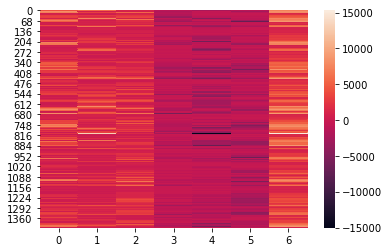

In [17]:
sns.heatmap(X[:,7:14])

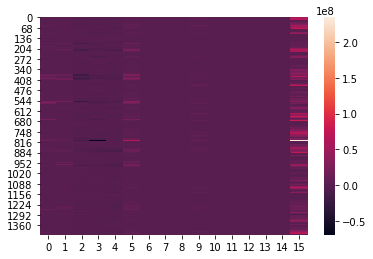

In [25]:
sns.heatmap(X[:,15:31])

In [41]:
for i in range(32,47):
    print("Max of Column {} is {}".format(i, np.max(X[:,i])))

Max of Column 32 is 5.4916756499768056e+16
Max of Column 33 is 0.04048950967433745
Max of Column 34 is 2.687633650759665e-06
Max of Column 35 is 4.406107665091473e-09
Max of Column 36 is 7.223374640695725e-12
Max of Column 37 is 8392.385993553662
Max of Column 38 is 4960686720354132.0
Max of Column 39 is 3.4939179480333965e+23
Max of Column 40 is 2.4608412737497835e+31
Max of Column 41 is 0.002821275978520168
Max of Column 42 is 6.335520266132675e-11
Max of Column 43 is 5.042819537043176e-16
Max of Column 44 is 4.013881704257784e-21
Max of Column 45 is 4.084627464881103
Max of Column 46 is 9.636148728857867


In [4]:
vif_df = calc_vif(X)
vif_df

,variables,VIF
0,0,0.758610
1,1,0.733677
2,2,0.663720
3,3,1.327153
4,4,0.811514
5,5,0.783419
6,6,0.344440
7,7,0.944525
8,8,0.807175
9,9,0.687489


Problematic variables are index 31, 38, 39, 40. Delete 40

In [5]:
vif_df2 = calc_vif(np.delete(X, 40, axis=1))
vif_df2

,variables,VIF
0,0,1.483452
1,1,0.995879
2,2,0.854036
3,3,2.173559
4,4,0.963910
5,5,0.964481
6,6,0.701488
7,7,2.093722
8,8,1.088626
9,9,1.008804


Problematic variables are index 30, 31, 32, 38, 39. Delete 39


In [6]:
vif_df3 = calc_vif(np.delete(X, [39,40], axis=1))
vif_df3

,variables,VIF
0,0,17.061088
1,1,8.452871
2,2,5.910834
3,3,6.637945
4,4,3.933401
5,5,2.996938
6,6,416.966257
7,7,30.061931
8,8,7.916233
9,9,5.476471


Too many variables pop up, need an algorithm to perform stepwise selection.

In [7]:
from util_relaimpo import *

In [8]:
xdf = pd.DataFrame(X)
x_selected, vif = vifStepwiseSelect(xdf)

Iteration  2
Problematic variables are:  [31, 38, 39, 40]
Delete variable NO. 40
Iteration  3
Problematic variables are:  [20, 30, 31, 32, 38, 39]
Delete variable NO. 39
Iteration  4
Problematic variables are:  [0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 29, 30, 31, 32, 37, 38, 45]
Delete variable NO. 31
Iteration  5
Problematic variables are:  [0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 32, 33, 37, 38, 41, 45, 46]
Delete variable NO. 23
Iteration  6
Problematic variables are:  [0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 29, 30, 32, 33, 37, 38, 41, 45, 46]
Delete variable NO. 20
Iteration  7
Problematic variables are:  [0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22, 24, 29, 30, 32, 33, 37, 38, 41, 45, 46]
Delete variable NO. 13
Iteration  8
Problematic variables are:  [0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19, 21, 22, 24, 29, 30, 32, 37, 38, 45]
Dele

VIF selection filtered out 18 variables and left 30 variables.

## Linear Model

In [9]:
ss = StandardScaler()
x_selected_s = ss.fit_transform(x_selected)

In [10]:
lr = LinearRegression()
lr.fit(x_selected_s, Y)

LinearRegression()

## Feature Importance

### 1. Standard Coefficients

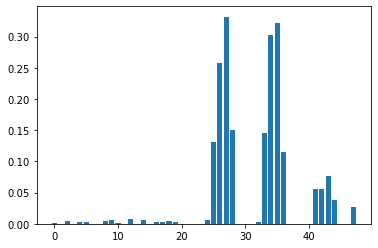

In [11]:
import matplotlib.pyplot as plt
plt.bar(x_selected.columns, abs(lr.coef_[0,:]))
plt.show()

In [13]:
# ranking of feature importance
from scipy.stats import rankdata
rankdata(-abs(lr.coef_[0,:]))

array([27., 20., 30., 23., 25., 18., 17., 28., 14., 15., 29., 21., 26.,
       19., 24., 16.,  7.,  4.,  1.,  5., 22.,  6.,  3.,  2.,  8., 10.,
       11.,  9., 12., 13.])

### Save as csv file

In [1]:
x_name = 'AF_X_ang_vel.npy'
from util import loadNpy
X = loadNpy(['data', 'X', x_name])
print(X.shape)

(184, 84)


In [3]:
import numpy as np
np.savetxt('AF.csv', X, delimiter=',')